In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime as dt

In [2]:
def get_year_and_month(df, col):
    """Converts a column to datetime then adds new columns for years and months"""
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col])
    df["year"] = df[col].dt.year
    df["year_and_month"] = df[col].dt.strftime("%Y-%m")

In [3]:
# Importing UK countries population data
uk_countries_pop = pd.read_csv("NomisUkCountriesPopulationEstimates.csv", skiprows=6)
uk_countries_pop

,country,2019,2020,2021
0,United Kingdom,66796807,67081234,67026292
1,Great Britain,64903140,65185724,65121729
2,England,56286961,56550138,56536419
3,Wales,3152879,3169586,3105410
4,Scotland,5463300,5466000,5479900
5,Northern Ireland,1893667,1895510,1904563
6,England and Wales,59439840,59719724,59641829


In [4]:
# Removing the unndeeded rows which combine UK countries 
uk_countries_pop = uk_countries_pop[
    uk_countries_pop["country"].isin(
        ["England", "Scotland", "Wales", "Northern Ireland"]
    )
]

In [5]:
# Need to reshape the data so it is joinable with the other tables
uk_countries_pop = pd.melt(
    uk_countries_pop, id_vars="country", var_name="year", value_name="population"
).reset_index()

# Display the pivoted DataFrame
uk_countries_pop

,index,country,year,population
0,0,England,2019,56286961
1,1,Wales,2019,3152879
2,2,Scotland,2019,5463300
3,3,Northern Ireland,2019,1893667
4,4,England,2020,56550138
5,5,Wales,2020,3169586
6,6,Scotland,2020,5466000
7,7,Northern Ireland,2020,1895510
8,8,England,2021,56536419
9,9,Wales,2021,3105410


In [6]:
# Importing UK Covid data
covid_data_by_uk_countries = pd.read_csv("CovidDataByUkCountries.csv")

In [7]:
covid_data_by_uk_countries

,areaCode,areaName,areaType,date,cumAdmissions,cumDailyNsoDeathsByDeathDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,hospitalCases,newDailyNsoDeathsByDeathDate
0,E92000001,England,nation,2023-09-15,1066607.0,NaN,NaN,3041.0,NaN
1,E92000001,England,nation,2023-09-14,1066282.0,NaN,NaN,3165.0,NaN
2,E92000001,England,nation,2023-09-13,1065944.0,NaN,41773060.0,3205.0,NaN
3,E92000001,England,nation,2023-09-12,1065568.0,NaN,41772998.0,3285.0,NaN
4,E92000001,England,nation,2023-09-11,1065134.0,NaN,41772920.0,3370.0,NaN
...,...,...,...,...,...,...,...,...,...
5164,W92000004,Wales,nation,2020-03-19,NaN,11.0,NaN,NaN,4.0
5165,W92000004,Wales,nation,2020-03-18,NaN,7.0,NaN,NaN,2.0
5166,W92000004,Wales,nation,2020-03-17,NaN,5.0,NaN,NaN,1.0
5167,W92000004,Wales,nation,2020-03-16,NaN,4.0,NaN,NaN,3.0


In [8]:
# Generate year and month columns for reporting
get_year_and_month(covid_data_by_uk_countries, "date")

In [9]:
# Creating a database for the tables
conn = sqlite3.connect("uk_countries_covid_database.db")
cur = conn.cursor()

In [10]:
# Importing the UK population and Covid data to the database
uk_countries_pop.to_sql(
    "PopulationByUkCountries", conn, if_exists="replace", index=False
)
covid_data_by_uk_countries.to_sql(
    "CovidDataByUkCountries", conn, if_exists="replace", index=False
)

In [11]:
# Ensuring the tables are in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
cur.fetchall()

[('PopulationByUkCountries',), ('CovidDataByUkCountries',)]

In [12]:
covid_data_by_uk_countries

,areaCode,areaName,areaType,date,cumAdmissions,cumDailyNsoDeathsByDeathDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,hospitalCases,newDailyNsoDeathsByDeathDate,year,year_and_month
0,E92000001,England,nation,2023-09-15,1066607.0,NaN,NaN,3041.0,NaN,2023,2023-09
1,E92000001,England,nation,2023-09-14,1066282.0,NaN,NaN,3165.0,NaN,2023,2023-09
2,E92000001,England,nation,2023-09-13,1065944.0,NaN,41773060.0,3205.0,NaN,2023,2023-09
3,E92000001,England,nation,2023-09-12,1065568.0,NaN,41772998.0,3285.0,NaN,2023,2023-09
4,E92000001,England,nation,2023-09-11,1065134.0,NaN,41772920.0,3370.0,NaN,2023,2023-09
...,...,...,...,...,...,...,...,...,...,...,...
5164,W92000004,Wales,nation,2020-03-19,NaN,11.0,NaN,NaN,4.0,2020,2020-03
5165,W92000004,Wales,nation,2020-03-18,NaN,7.0,NaN,NaN,2.0,2020,2020-03
5166,W92000004,Wales,nation,2020-03-17,NaN,5.0,NaN,NaN,1.0,2020,2020-03
5167,W92000004,Wales,nation,2020-03-16,NaN,4.0,NaN,NaN,3.0,2020,2020-03


In [13]:
# Using SQL to aggregate Covid hospitalisations and deaths per 100k of population
covid_data_vs_uk_pop = pd.read_sql(
    """
SELECT 
    cduc.year_and_month, 
    puc.country,
    puc.population, 
    MAX(cduc.cumPeopleVaccinatedSecondDoseByVaccinationDate) AS second_vaccine,
    (MAX(cduc.cumPeopleVaccinatedSecondDoseByVaccinationDate) / puc.population) * 100 AS second_vaccine_percent_of_pop,
    MAX(cduc.hospitalCases) AS daily_hospitalisations,
    (MAX(cduc.hospitalCases) / puc.population) * 100000 AS daily_hospitalisations_per_100k,
    MAX(cduc.newDailyNsoDeathsByDeathDate) AS new_daily_deaths,
    (MAX(cduc.newDailyNsoDeathsByDeathDate) / puc.population) * 100000 AS daily_deaths_per_100k
FROM PopulationByUkCountries AS puc
JOIN CovidDataByUkCountries AS cduc
    ON CDUC.year = PUC.year
    AND CDUC.areaName = PUC.country
GROUP BY 
    cduc.year_and_month, 
    puc.country,
    puc.population;
    """,
    conn,
)

In [14]:
# Not all the Covid data starts at the same time so using March 2020 as the starting point
covid_data_vs_uk_pop = covid_data_vs_uk_pop[covid_data_vs_uk_pop['year_and_month'] >= '2020-03']

In [15]:
covid_data_vs_uk_pop

,year_and_month,country,population,second_vaccine,second_vaccine_percent_of_pop,daily_hospitalisations,daily_hospitalisations_per_100k,new_daily_deaths,daily_deaths_per_100k
2,2020-03,England,56550138,NaN,NaN,11154.0,19.724090,741.0,1.310342
3,2020-03,Northern Ireland,1895510,NaN,NaN,60.0,3.165375,9.0,0.474806
4,2020-03,Scotland,5466000,NaN,NaN,752.0,13.757775,57.0,1.042810
5,2020-03,Wales,3169586,NaN,NaN,NaN,NaN,23.0,0.725647
6,2020-04,England,56550138,NaN,NaN,18974.0,33.552526,1286.0,2.274088
...,...,...,...,...,...,...,...,...,...
85,2021-11,Wales,3105410,2306146.0,74.262207,707.0,22.766720,16.0,0.515230
86,2021-12,England,56536419,38992146.0,68.968192,12395.0,21.923921,156.0,0.275928
87,2021-12,Northern Ireland,1904563,1266355.0,66.490581,274.0,14.386502,10.0,0.525055
88,2021-12,Scotland,5479900,3911946.0,71.387179,859.0,15.675469,21.0,0.383219


In [16]:
# Getting the max of the metrics for use in the axis
max_daily_deaths_percent_of_pop = max(covid_data_vs_uk_pop["daily_deaths_per_100k"])
max_second_vaccine_percent_of_pop = max(covid_data_vs_uk_pop["second_vaccine_percent_of_pop"])
max_daily_hospitalisations_percent_of_pop = max(covid_data_vs_uk_pop["daily_hospitalisations_per_100k"])


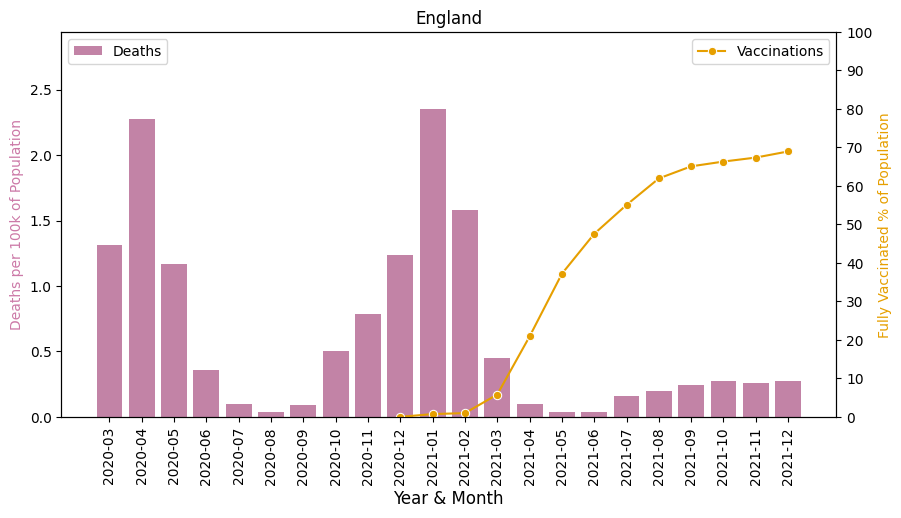

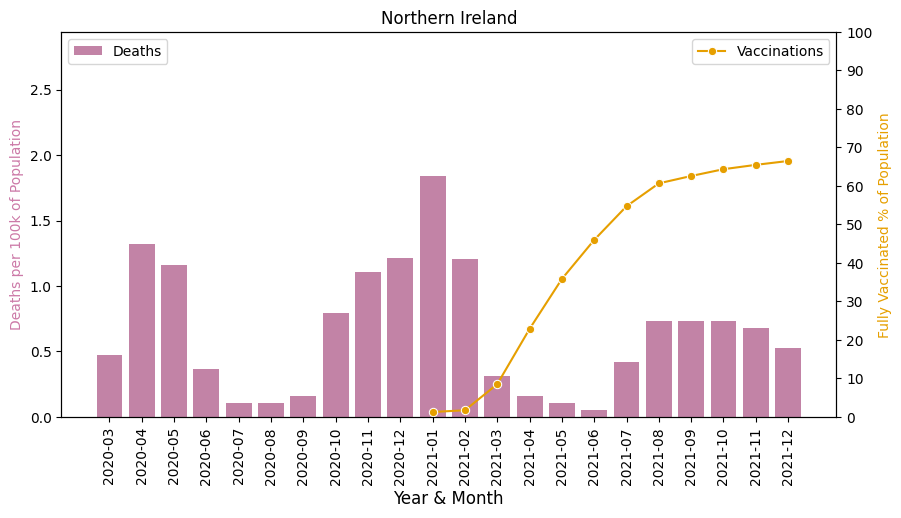

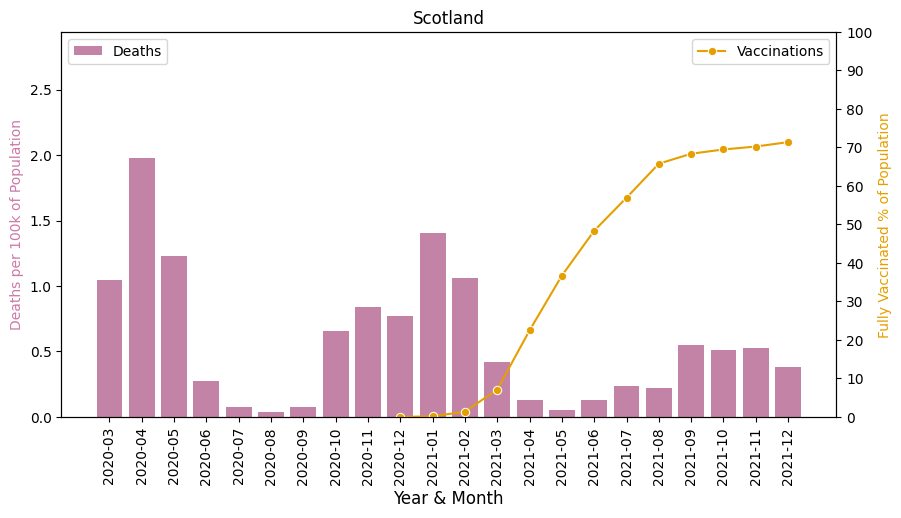

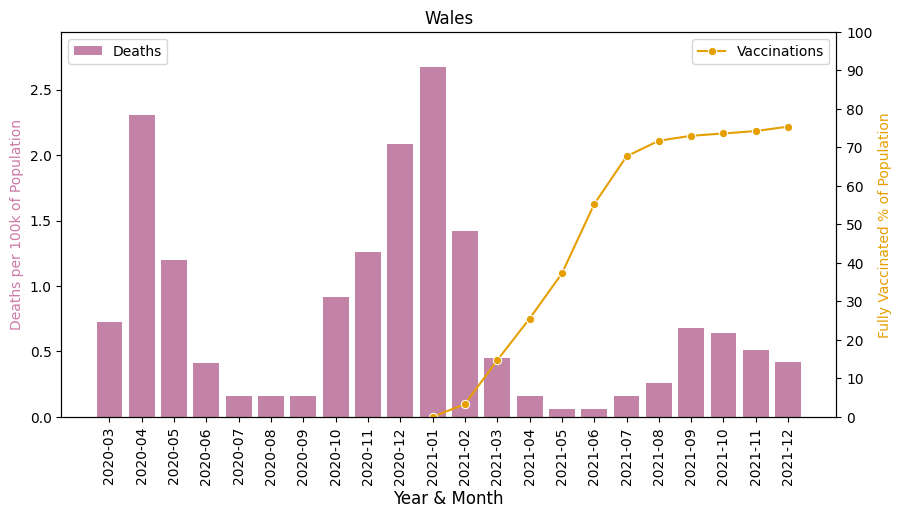

In [17]:
# Creating a chart for each UK country of vaccinations vs deaths
for country in covid_data_vs_uk_pop["country"].unique():
    by_country = covid_data_vs_uk_pop[covid_data_vs_uk_pop["country"] == country]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    plt.xticks(rotation=90)

    sns.barplot(
        data=by_country,
        x="year_and_month",
        y="daily_deaths_per_100k",
        label="Deaths",
        ax=ax1,
        color="#CC79A7",
        zorder=1,
    )

    ax2 = ax1.twinx()

    sns.lineplot(
        data=by_country,
        x="year_and_month",
        y="second_vaccine_percent_of_pop",
        label="Vaccinations",
        marker="o",
        sort=False,
        ax=ax2,
        color="#E69F00",
        zorder=2,
    )

    ax1.set_title(
        country
    )
    ax1.set_xlabel("Year & Month", fontsize=12)
    ax1.set_ylabel("Deaths per 100k of Population", color="#CC79A7")
    ax1.set_ylim(0, max_daily_deaths_percent_of_pop * 1.1)
    ax2.set_ylabel("Fully Vaccinated % of Population", color="#E69F00")
    ax2.set_ylim(0, 100)
    ax2.set_yticks(range(0, 101, 10))

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()


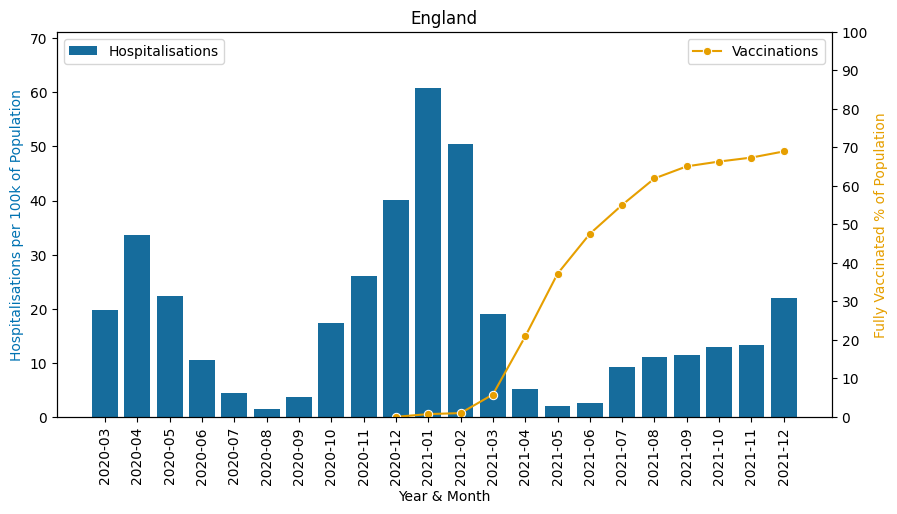

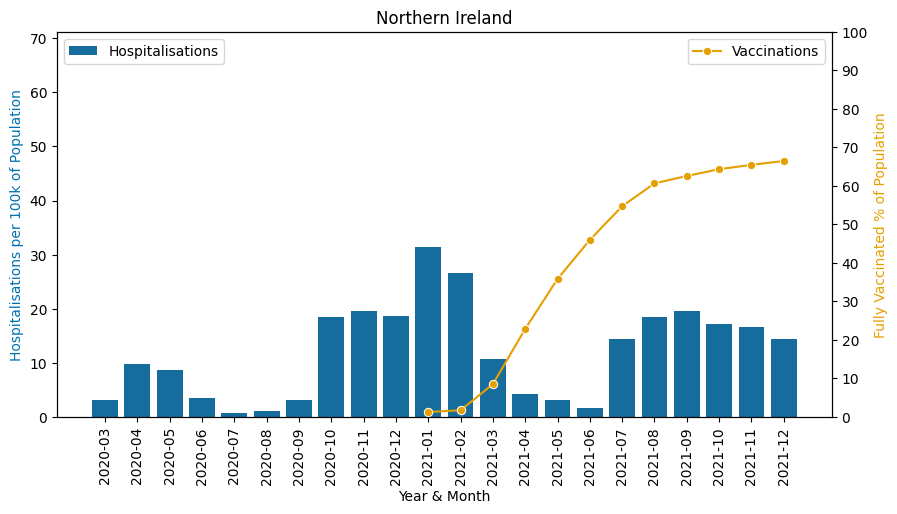

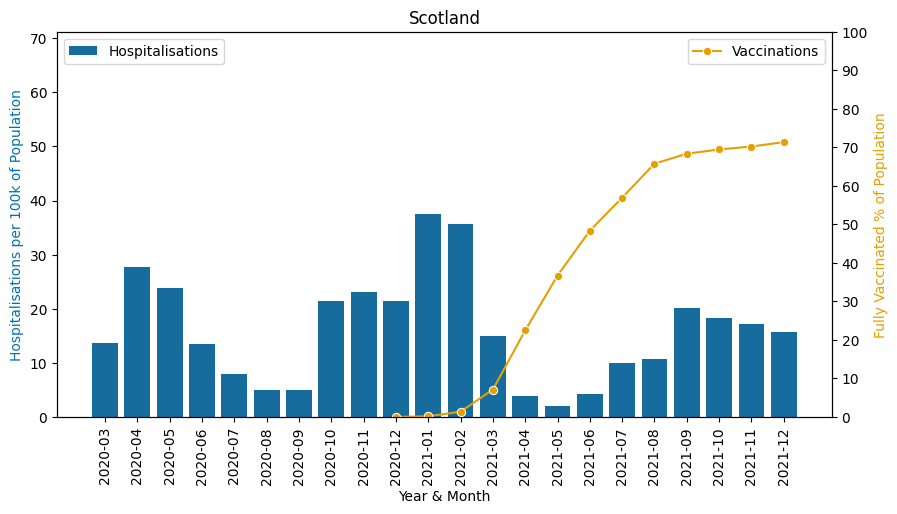

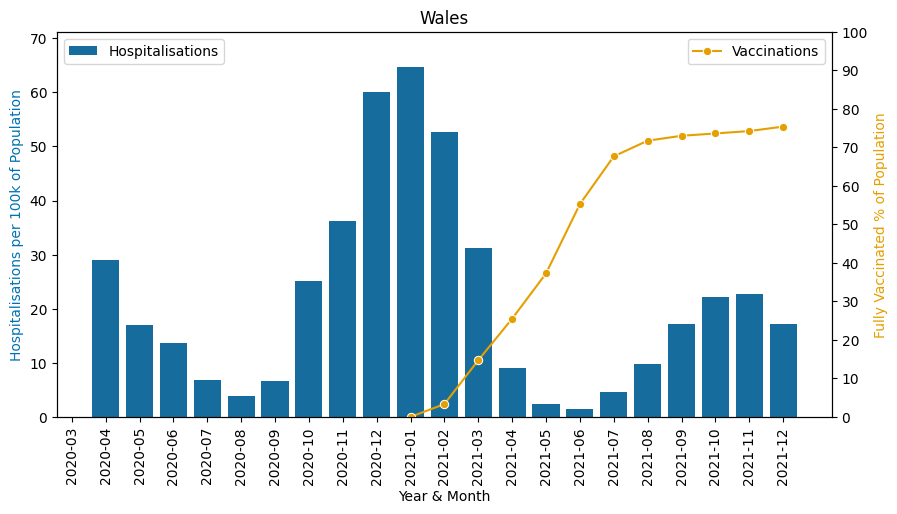

In [18]:
# Creating a chart for each UK country of vaccinations vs hospitalisations
for country in covid_data_vs_uk_pop["country"].unique():
    by_country = covid_data_vs_uk_pop[covid_data_vs_uk_pop["country"] == country]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    plt.xticks(rotation=90)

    sns.barplot(
        data=by_country,
        x="year_and_month",
        y="daily_hospitalisations_per_100k",
        label="Hospitalisations",
        ax=ax1,
        color="#0072B2",
        zorder=1,
    )

    ax2 = ax1.twinx()

    sns.lineplot(
        data=by_country,
        x="year_and_month",
        y="second_vaccine_percent_of_pop",
        label="Vaccinations",
        marker="o",
        sort=False,
        ax=ax2,
        color="#E69F00",
        zorder=2,
    )

    ax1.set_title(country)
    ax1.set_xlabel("Year & Month")
    ax1.set_ylabel("Hospitalisations per 100k of Population", color="#0072B2")
    ax1.set_ylim(0, max_daily_hospitalisations_percent_of_pop * 1.1)
    ax2.set_ylabel("Fully Vaccinated % of Population", color="#E69F00")
    ax2.set_ylim(0, 100)
    ax2.set_yticks(range(0, 101, 10))

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()

In [19]:
# Creating a different view of the data, deaths per million of population over time during the pandemic
covid_data_vs_uk_pop2 = pd.read_sql(
    """
SELECT 
    cduc.year_and_month, 
    puc.country,
    puc.population, 
    MAX(cduc.cumPeopleVaccinatedSecondDoseByVaccinationDate) AS second_vaccine,
    (MAX(cduc.cumPeopleVaccinatedSecondDoseByVaccinationDate) / puc.population) * 100 AS second_vaccine_percent_of_pop,
    MAX(cduc.newDailyNsoDeathsByDeathDate) AS new_daily_deaths,
    (MAX(cduc.newDailyNsoDeathsByDeathDate) / puc.population) * 1000000 AS daily_deaths_per_mil
FROM PopulationByUkCountries AS puc
JOIN CovidDataByUkCountries AS cduc
    ON CDUC.year = PUC.year
    AND CDUC.areaName = PUC.country
GROUP BY 
    cduc.year_and_month, 
    puc.country,
    puc.population;
    """,
    conn,
)

In [20]:
# Using December 2020 as the starting point
covid_data_vs_uk_pop2 = covid_data_vs_uk_pop2[covid_data_vs_uk_pop2['year_and_month'] >= '2020-12']

In [21]:
covid_data_vs_uk_pop2

,year_and_month,country,population,second_vaccine,second_vaccine_percent_of_pop,new_daily_deaths,daily_deaths_per_mil
38,2020-12,England,56550138,20198.0,0.035717,701.0,12.396079
39,2020-12,Northern Ireland,1895510,NaN,NaN,23.0,12.133938
40,2020-12,Scotland,5466000,41.0,0.000750,42.0,7.683864
41,2020-12,Wales,3169586,NaN,NaN,66.0,20.822909
42,2021-01,England,56536419,422891.0,0.747997,1328.0,23.489284
43,2021-01,Northern Ireland,1904563,24612.0,1.292265,35.0,18.376919
44,2021-01,Scotland,5479900,8928.0,0.162923,77.0,14.051351
45,2021-01,Wales,3105410,1034.0,0.033297,83.0,26.727550
46,2021-02,England,56536419,567945.0,1.004565,893.0,15.795128
47,2021-02,Northern Ireland,1904563,33197.0,1.743025,23.0,12.076261


In [22]:
# Colour-blind friendly theme
colours = {'England':'#E69F00', 'Scotland':'#56B4E9', 'Wales':'#009E73','Northern Ireland':'#CC79A7'}

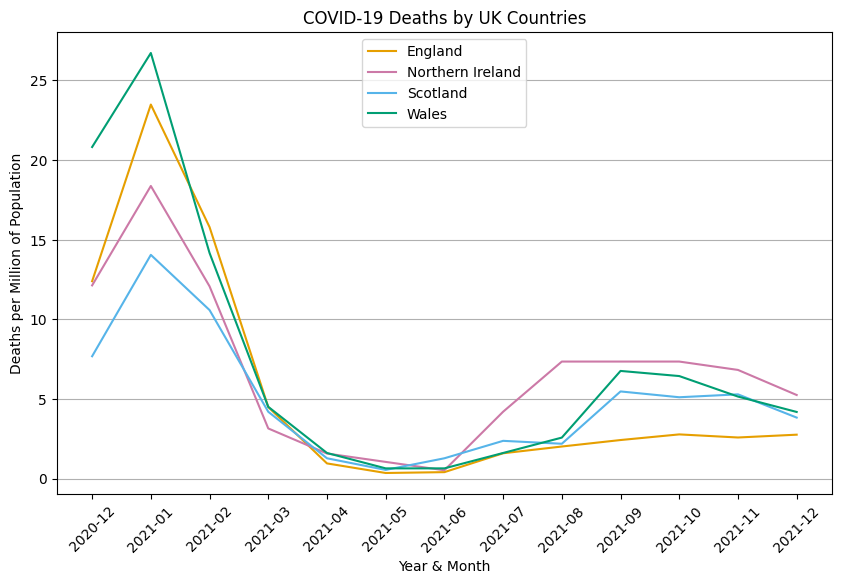

In [23]:
# Generating a line on a chart for each UK country of Covid deaths per million of population
plt.figure(figsize=(10, 6))

for country in covid_data_vs_uk_pop2["country"].unique():
    by_country = covid_data_vs_uk_pop2[covid_data_vs_uk_pop2["country"] == country]
    plt.plot(
        by_country["year_and_month"], by_country["daily_deaths_per_mil"], label=country, color=colours.get(country)
    )

plt.xlabel("Year & Month")
plt.ylabel("Deaths per Million of Population")
plt.title("COVID-19 Deaths by UK Countries")
plt.legend(loc="upper center")
plt.grid(True, axis="y")
plt.xticks(rotation=45)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0848d0af-8527-4b35-813b-265c56a81f9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>